In [1]:
# required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# loading data
df = pd.read_table("./amazon_alexa.tsv")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.shape # checkimg shape of the data

(3150, 5)

In [4]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
# droping columns
df.drop(labels=['rating', 'date', 'variation'],axis=1,inplace=True)

In [6]:
df.columns = ['text','label'] # changing column names

In [7]:
df.head()

,text,label
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [8]:
# Checking missing values
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
# checking labels percentage 
round(df['label'].value_counts()/len(df)*100)

1    92.0
0     8.0
Name: label, dtype: float64

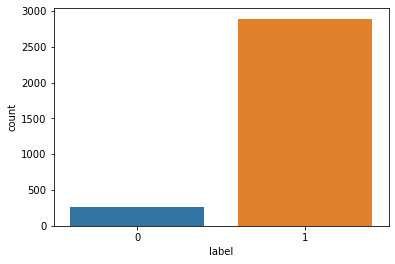

In [10]:
sns.countplot(x='label',data=df)
plt.show()

- dataset is imbalance data so make the imbalance dataset into balance by using `resample`

In [11]:
# deviding majority and minority classes
df_majority  = df[df.label==1]
df_minority  = df[df.label==0]

# upsampling minority classes
df_upsampling = resample(df_minority,replace=True,
                         n_samples=len(df_majority),
                         random_state=1)

# combine both
data = pd.concat([df_majority,df_upsampling])

In [12]:
data.label.value_counts()

0    2893
1    2893
Name: label, dtype: int64

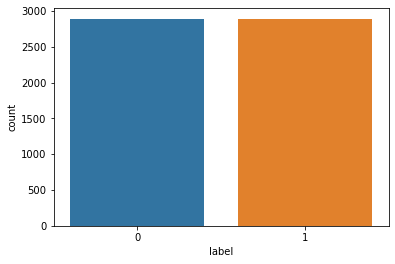

In [13]:
sns.countplot(x='label',data=data)
plt.show()

In [14]:
# dividing independent and dependent
x = data.text
y = data.label

In [15]:
# splitting data into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4050,), (1736,), (4050,), (1736,))

In [17]:
# vectorization and removing stopwords
vector = CountVectorizer(stop_words='english')

vector.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [18]:
vector.vocabulary_

{'doesn': 909,
 'use': 3181,
 'apple': 224,
 'music': 1928,
 'worthless': 3335,
 'sound': 2765,
 'quality': 2322,
 'poor': 2209,
 'nope': 1985,
 'lot': 1789,
 'improved': 1486,
 'things': 3012,
 'ask': 249,
 'says': 2561,
 'hmmmm': 1414,
 'dont': 917,
 'know': 1652,
 'new': 1962,
 'amazon': 191,
 'products': 2272,
 'great': 1317,
 'bought': 391,
 'refurbished': 2417,
 'complete': 615,
 'garbage': 1250,
 'purchase': 2310,
 'total': 3064,
 'dissatisfaction': 894,
 'weeks': 3283,
 'setting': 2629,
 'longer': 1776,
 'works': 3328,
 'connection': 642,
 'light': 1721,
 'guess': 1333,
 'shouldn': 2655,
 'purchased': 2311,
 'dot': 922,
 'alexa': 168,
 'awesome': 292,
 'rcieved': 2356,
 'buld': 425,
 'did': 832,
 'need': 1949,
 'adapter': 110,
 'work': 3321,
 'aware': 290,
 'disappointed': 865,
 'echo': 960,
 'stops': 2860,
 'function': 1232,
 'performing': 2131,
 'quite': 2333,
 'wake': 3243,
 'time': 3033,
 'randomly': 2345,
 'turns': 3114,
 'does': 908,
 'buy': 437,
 'worked': 3323,
 'months

In [19]:
# transforming
x_train_trans = vector.transform(x_train)
x_test_trans = vector.transform(x_test)

In [20]:
mnb = MultinomialNB()# model initialization

# traing model
mnb.fit(x_train_trans,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# predict
y_pred = mnb.predict(x_test_trans)
y_pred_prob = mnb.predict_proba(x_test_trans)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
metrics.accuracy_score(y_test,y_pred)

0.9498847926267281

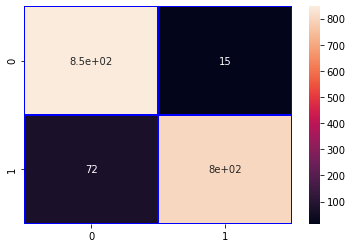

In [23]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),
            annot=True,linewidths=0.5,linecolor='b',)
plt.show()

In [24]:
fpr,tpr,th = metrics.roc_curve(y_test,y_pred_prob[:,1])

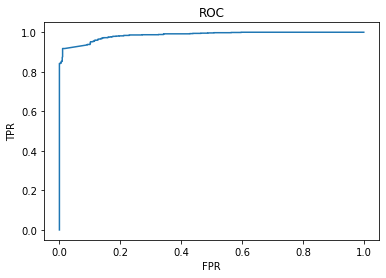

In [25]:
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC')
plt.show()

In [26]:
print("Area under the curve is : ",metrics.roc_auc_score(y_test,y_pred_prob[:,1]))

Area under the curve is :  0.9856521473662974


___________

_________